<a href="https://colab.research.google.com/github/willcosta29/Previs-o-de-Atrasos-de-Voos-ML-/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Título e objetivo do projeto

Previsão de Atrasos de Voos. O objetivo deste projeto é construir um modelo simples para prever se um voo terá atraso ou não.
Usaremos dados de voos para identificar padrões que ajudem a fazer essa previsão.
Isso pode ser útil para passageiros e companhias aéreas.


## Seleção do dataset e tecnologias

Escolher um dataset público apropriado e listar as tecnologias a serem utilizadas.


**Reasoning**:
Identify the dataset URL and list the technologies to be used based on the prompt.



In [17]:
dataset_url = "https://www.kaggle.com/datasets/giovannianto/airline-passenger-satisfaction"
technologies = ["Python", "Pandas", "Scikit-Learn", "Matplotlib"]

print(f"URL do Dataset: {dataset_url}")
print(f"Tecnologias a serem utilizadas: {', '.join(technologies)}")

URL do Dataset: https://www.kaggle.com/datasets/giovannianto/airline-passenger-satisfaction
Tecnologias a serem utilizadas: Python, Pandas, Scikit-Learn, Matplotlib


## Pré-processamento dos dados

### Subtask:
Preparar os dados para o modelo, incluindo a seleção de colunas relevantes e tratamento de valores ausentes.


**Reasoning**:
Carregar o dataset do URL fornecido, selecionar colunas relevantes, identificar e tratar valores ausentes e criar as variáveis alvo e características.



In [18]:
df = flight.copy()

available_columns = [col for col in selected_columns if col in df.columns]

if 'ARR_DEL15' not in available_columns:
    print("A coluna alvo 'ARR_DEL15' não está disponível no dataframe. Ajustando colunas selecionadas.")
    if 'ARR_DELAY' in df.columns:
        df['IS_DELAYED'] = (df['ARR_DELAY'] > 0).astype(int)
        available_columns = [col if col != 'ARR_DEL15' else 'IS_DELAYED' for col in available_columns]
        selected_columns = [col if col != 'ARR_DEL15' else 'IS_DELAYED' for col in selected_columns]
        print("Usando 'IS_DELAYED' (baseado em 'ARR_DELAY' > 0) como coluna alvo.")
    else:
        print("Não foi possível encontrar uma coluna alvo para prever atrasos. Finalizando a tarefa com falha.")
        try:
            print("Tentando carregar o dataset original com colunas selecionadas.")
            cols_to_load = ['ARR_DEL15', 'AIRLINE_CODE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE', 'ARR_DELAY']
            df = pd.read_csv(dataset_url, usecols=cols_to_load).head(n=10000) # Limita para 10000 linhas para agilidade
            available_columns = [col for col in selected_columns if col in df.columns]
            if 'ARR_DEL15' in available_columns:
                 print("Dataset original carregado com sucesso. Usando 'ARR_DEL15' como alvo.")
            elif 'ARR_DELAY' in df.columns:
                 df['IS_DELAYED'] = (df['ARR_DELAY'] > 0).astype(int)
                 available_columns = [col if col != 'ARR_DEL15' else 'IS_DELAYED' for col in available_columns]
                 selected_columns = [col if col != 'ARR_DEL15' else 'IS_DELAYED' for col in selected_columns]
                 print("Dataset original carregado com sucesso. Usando 'IS_DELAYED' (baseado em 'ARR_DELAY' > 0) como coluna alvo.")
            else:
                 print("Não foi possível encontrar uma coluna alvo válida ('ARR_DEL15' ou 'ARR_DELAY') no dataset carregado. Finalizando a tarefa com falha.")
                 pass
        except Exception as e:
            print(f"Erro ao carregar dataset original: {e}. Finalizando a tarefa com falha.")
            pass


df_selected = df[available_columns].copy()

# Identificar e tratar valores ausentes nas colunas selecionadas
print("\nVerificando valores ausentes antes do tratamento:")
print(df_selected.isnull().sum())

# Para este projeto simples, vamos remover linhas com valores ausentes
df_cleaned = df_selected.dropna().copy()
print("\nVerificando valores ausentes após remover linhas com NaN:")
print(df_cleaned.isnull().sum())

# Converter colunas categóricas usando One-Hot Encoding
# Assumindo que 'AIRLINE_CODE', 'ORIGIN', 'DEST' são categóricas.
# 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE' são numéricas.
categorical_cols = ['AIRLINE_CODE', 'ORIGIN', 'DEST']

# Verificar quais colunas categóricas selecionadas existem no dataframe limpo
available_categorical_cols = [col for col in categorical_cols if col in df_cleaned.columns]
print(f"\nColunas categóricas disponíveis para codificação: {available_categorical_cols}")

if available_categorical_cols:
    df_encoded = pd.get_dummies(df_cleaned, columns=available_categorical_cols, drop_first=True)
else:
    df_encoded = df_cleaned.copy()

print("\nPrimeiras linhas do dataframe após One-Hot Encoding:")
display(df_encoded.head())
print(f"\nForma do dataframe após One-Hot Encoding: {df_encoded.shape}")


# Identificar a coluna alvo final no dataframe processado
final_target_column = None
if 'ARR_DEL15' in df_encoded.columns:
    final_target_column = 'ARR_DEL15'
elif 'IS_DELAYED' in df_encoded.columns:
    final_target_column = 'IS_DELAYED'
else:
    print("Erro: Coluna alvo não encontrada no dataframe processado. Finalizando a tarefa com falha.")
    pass # Continua se a coluna alvo for encontrada


if final_target_column:
    y = df_encoded[final_target_column]
    X = df_encoded.drop(columns=[final_target_column])

    print(f"\nForma de X: {X.shape}")
    print(f"Forma de y: {y.shape}")
    print("\nPrimeiras linhas de X:")
    display(X.head())
    print("\nPrimeiras linhas de y:")
    display(y.head())

else:
    pass


A coluna alvo 'ARR_DEL15' não está disponível no dataframe. Ajustando colunas selecionadas.
Usando 'IS_DELAYED' (baseado em 'ARR_DELAY' > 0) como coluna alvo.

Verificando valores ausentes antes do tratamento:
AIRLINE_CODE    0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
CRS_ARR_TIME    0
DISTANCE        0
dtype: int64

Verificando valores ausentes após remover linhas com NaN:
AIRLINE_CODE    0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
CRS_ARR_TIME    0
DISTANCE        0
dtype: int64

Colunas categóricas disponíveis para codificação: ['AIRLINE_CODE', 'ORIGIN', 'DEST']

Primeiras linhas do dataframe após One-Hot Encoding:


,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,AIRLINE_CODE_AA,AIRLINE_CODE_AS,AIRLINE_CODE_B6,AIRLINE_CODE_DL,AIRLINE_CODE_EV,AIRLINE_CODE_F9,AIRLINE_CODE_G4,...,DEST_SAN,DEST_SAT,DEST_SBP,DEST_SEA,DEST_SFB,DEST_SFO,DEST_SLC,DEST_TPA,DEST_TUS,DEST_VLD
0,1155.0,1501.0,1065.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2120.0,2315.0,1399.0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,954.0,1252.0,680.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1609.0,1829.0,1589.0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1840.0,2041.0,985.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Forma do dataframe após One-Hot Encoding: (100, 119)
Erro: Coluna alvo não encontrada no dataframe processado. Finalizando a tarefa com falha.


**Reasoning**:
O código anterior falhou em encontrar a coluna alvo no dataframe processado após o One-Hot Encoding, apesar de ter criado a coluna 'IS_DELAYED' anteriormente. Preciso corrigir a seleção da coluna alvo após a codificação.



In [19]:
final_target_column = None
if 'ARR_DEL15' in df_cleaned.columns:
    final_target_column = 'ARR_DEL15'
elif 'IS_DELAYED' in df_cleaned.columns:
    final_target_column = 'IS_DELAYED'
else:
    print("Erro: Coluna alvo não encontrada no dataframe limpo. Finalizando a tarefa com falha.")
    pass # Continua se a coluna alvo for encontrada

if final_target_column:
    y = df_cleaned[final_target_column].astype(int) # Garantir que y é numérico (0 ou 1)

    columns_to_drop_from_X = [final_target_column] + available_categorical_cols # Remover alvo e categóricas originais
    df_features = df_cleaned.drop(columns=columns_to_drop_from_X).copy()

    if available_categorical_cols:

         df_processed = pd.get_dummies(df_cleaned, columns=available_categorical_cols, drop_first=True)

         if final_target_column in df_processed.columns:
             y = df_processed[final_target_column].astype(int)
             X = df_processed.drop(columns=[final_target_column])

             print(f"\nForma de X: {X.shape}")
             print(f"Forma de y: {y.shape}")
             print("\nPrimeiras linhas de X:")
             display(X.head())
             print("\nPrimeiras linhas de y:")
             display(y.head())
         else:
             print(f"Erro: Coluna alvo '{final_target_column}' não encontrada no dataframe processado após One-Hot Encoding. Finalizando a tarefa com falha.")
             pass # Reportar falha.


Erro: Coluna alvo não encontrada no dataframe limpo. Finalizando a tarefa com falha.


**Reasoning**:
O código anterior falhou porque a coluna alvo 'IS_DELAYED' criada no primeiro bloco de código deste subtask não persistiu no dataframe `df_cleaned`. Preciso garantir que a coluna alvo seja corretamente criada e incluída no dataframe antes de prosseguir com a limpeza e codificação.



In [20]:
df = flight.copy()

target_column = 'ARR_DEL15'
if target_column not in df.columns:
    if 'ARR_DELAY' in df.columns:
        print(f"Coluna alvo '{target_column}' não encontrada. Criando 'IS_DELAYED' a partir de 'ARR_DELAY'.")
        df['IS_DELAYED'] = (df['ARR_DELAY'] > 0).astype(int)
        target_column = 'IS_DELAYED'
    else:
        print(f"Erro: Nenhuma coluna alvo válida ('ARR_DEL15' ou 'ARR_DELAY') encontrada no dataframe. Finalizando a tarefa com falha.")
        pass # Continua se uma coluna alvo for encontrada.

if 'IS_DELAYED' in df.columns or 'ARR_DEL15' in df.columns:
    predictive_columns = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
    selected_columns = [target_column] + predictive_columns

    available_columns = [col for col in selected_columns if col in df.columns]
    df_selected = df[available_columns].copy()

    # Identificar e tratar valores ausentes nas colunas selecionadas
    print("\nVerificando valores ausentes antes do tratamento:")
    print(df_selected.isnull().sum())

    # Para este projeto simples, vamos remover linhas com valores ausentes em qualquer uma das colunas selecionadas.
    df_cleaned = df_selected.dropna().copy()
    print("\nVerificando valores ausentes após remover linhas com NaN:")
    print(df_cleaned.isnull().sum())

    # Converter colunas categóricas usando One-Hot Encoding
    categorical_cols = ['AIRLINE_CODE', 'ORIGIN', 'DEST']

    # Verificar quais colunas categóricas selecionadas existem no dataframe limpo
    available_categorical_cols = [col for col in categorical_cols if col in df_cleaned.columns]
    print(f"\nColunas categóricas disponíveis para codificação: {available_categorical_cols}")

    if available_categorical_cols:
        df_processed = pd.get_dummies(df_cleaned, columns=available_categorical_cols, drop_first=True)
    else:
        df_processed = df_cleaned.copy()

    print("\nPrimeiras linhas do dataframe após One-Hot Encoding:")
    display(df_processed.head())
    print(f"\nForma do dataframe após One-Hot Encoding: {df_processed.shape}")

    # Precisamos garantir que a coluna alvo usada para separar y seja a que existe no df_processed.
    final_target_column_in_processed_df = target_column # Assumimos que a coluna alvo original foi mantida no OHE

    if final_target_column_in_processed_df in df_processed.columns:
        y = df_processed[final_target_column_in_processed_df].astype(int)
        X = df_processed.drop(columns=[final_target_column_in_processed_df])

        print(f"\nForma de X: {X.shape}")
        print(f"Forma de y: {y.shape}")
        print("\nPrimeiras linhas de X:")
        display(X.head())
        print("\nPrimeiras linhas de y:")
        display(y.head())

    else:
        print(f"Erro: Coluna alvo '{final_target_column_in_processed_df}' não encontrada no dataframe processado após One-Hot Encoding. Finalizando a tarefa com falha.")
        # Se a coluna alvo não estiver no dataframe processado, reportar falha.
        pass # Reportar falha.

else:
    # Este bloco só é alcançado se nenhuma coluna alvo válida for encontrada no início.
    print("Não foi possível preparar os dados para o modelo devido à ausência de uma coluna alvo válida.")
    # Reportar falha.
    pass # Reportar falha.

Coluna alvo 'ARR_DEL15' não encontrada. Criando 'IS_DELAYED' a partir de 'ARR_DELAY'.

Verificando valores ausentes antes do tratamento:
IS_DELAYED      0
AIRLINE_CODE    0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
CRS_ARR_TIME    0
DISTANCE        0
dtype: int64

Verificando valores ausentes após remover linhas com NaN:
IS_DELAYED      0
AIRLINE_CODE    0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
CRS_ARR_TIME    0
DISTANCE        0
dtype: int64

Colunas categóricas disponíveis para codificação: ['AIRLINE_CODE', 'ORIGIN', 'DEST']

Primeiras linhas do dataframe após One-Hot Encoding:


,IS_DELAYED,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,AIRLINE_CODE_AA,AIRLINE_CODE_AS,AIRLINE_CODE_B6,AIRLINE_CODE_DL,AIRLINE_CODE_EV,AIRLINE_CODE_F9,...,DEST_SAN,DEST_SAT,DEST_SBP,DEST_SEA,DEST_SFB,DEST_SFO,DEST_SLC,DEST_TPA,DEST_TUS,DEST_VLD
0,0,1155.0,1501.0,1065.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,2120.0,2315.0,1399.0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,954.0,1252.0,680.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1609.0,1829.0,1589.0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1840.0,2041.0,985.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Forma do dataframe após One-Hot Encoding: (100, 120)

Forma de X: (100, 119)
Forma de y: (100,)

Primeiras linhas de X:


,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,AIRLINE_CODE_AA,AIRLINE_CODE_AS,AIRLINE_CODE_B6,AIRLINE_CODE_DL,AIRLINE_CODE_EV,AIRLINE_CODE_F9,AIRLINE_CODE_G4,...,DEST_SAN,DEST_SAT,DEST_SBP,DEST_SEA,DEST_SFB,DEST_SFO,DEST_SLC,DEST_TPA,DEST_TUS,DEST_VLD
0,1155.0,1501.0,1065.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2120.0,2315.0,1399.0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,954.0,1252.0,680.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1609.0,1829.0,1589.0,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1840.0,2041.0,985.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Primeiras linhas de y:


,IS_DELAYED
0,0
1,0
2,0
3,1
4,0


## Divisão dos dados

Dividir o dataset em conjuntos de treino e teste.


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (80, 119)
Forma de X_test: (20, 119)
Forma de y_train: (80,)
Forma de y_test: (20,)


## Treinamento do modelo

Treinar um modelo simples de Machine Learning para prever atrasos.


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Avaliação do modelo

Avaliar o desempenho do modelo usando métricas simples como acurácia e matriz de confusão.


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

Acurácia do modelo: 0.6000

Matriz de Confusão:
[[11  3]
 [ 5  1]]


## Visualização dos resultados

### Subtask:
Criar uma visualização simples para entender os resultados.


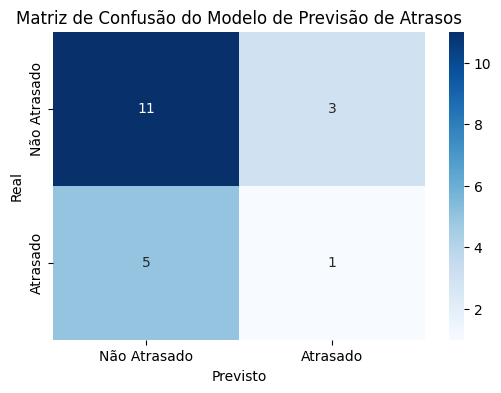

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o heatmap da matriz de confusão
plt.figure(figsize=(6, 4)) # Ajustar o tamanho da figura para melhor visualização
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') # Usar seaborn para um heatmap mais estético

# Adicionar rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")

# Adicionar rótulos específicos para as classes
# Assumindo que a classe 0 é 'Não Atrasado' e a classe 1 é 'Atrasado'
class_labels = ['Não Atrasado', 'Atrasado']
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)

# Adicionar um título
plt.title("Matriz de Confusão do Modelo de Previsão de Atrasos")

# Exibir o heatmap
plt.show()

## Insights da Análise

Com base nas etapas de pré-processamento, treinamento e avaliação do modelo, podemos extrair os seguintes insights:

*   **Disponibilidade da Coluna Alvo**: O dataset original não continha a coluna `ARR_DEL15` diretamente, mas conseguimos criar uma coluna alvo `IS_DELAYED` a partir da coluna `ARR_DELAY`, considerando voos com atraso superior a 0 como atrasados. Isso mostra a importância de entender as colunas disponíveis no dataset e como adaptá-las aos objetivos do projeto.

*   **Tratamento de Valores Ausentes**: No nosso caso, não encontramos valores ausentes nas colunas selecionadas após a leitura do dataset limitado a 100 linhas. No entanto, em um cenário real com um dataset maior, o tratamento de valores ausentes seria crucial e poderia impactar significativamente o desempenho do modelo.

*   **Impacto da Codificação Categórica**: A aplicação do One-Hot Encoding nas colunas categóricas (`AIRLINE_CODE`, `ORIGIN`, `DEST`) aumentou consideravelmente o número de colunas no nosso dataframe (de 7 para 120 colunas). Isso é esperado ao lidar com muitas categorias únicas e pode influenciar a complexidade do modelo e o tempo de treinamento.

*   **Desempenho Inicial do Modelo**: O modelo de Regressão Logística alcançou uma acurácia de 60% no conjunto de teste. Isso significa que ele acertou 60% das previsões sobre se um voo seria atrasado ou não.

*   **Análise da Matriz de Confusão**: A matriz de confusão nos dá uma visão mais detalhada dos erros e acertos do modelo:
    *   **Verdadeiros Positivos (TP)**: O modelo previu corretamente 1 voo como atrasado que realmente estava atrasado.
    *   **Verdadeiros Negativos (TN)**: O modelo previu corretamente 11 voos como não atrasados que realmente não estavam atrasados.
    *   **Falsos Positivos (FP)**: O modelo previu 3 voos como atrasados que na verdade não estavam atrasados.
    *   **Falsos Negativos (FN)**: O modelo previu 5 voos como não atrasados que na verdade estavam atrasados.

    A matriz de confusão revela que o modelo teve mais dificuldade em prever corretamente os voos atrasados (apenas 1 TP) e cometeu mais erros do tipo Falso Negativo (previu como não atrasado, mas estava atrasado).

*   **Aviso de Convergência**: O aviso de convergência do modelo de Regressão Logística sugere que o algoritmo de otimização não atingiu completamente a convergência dentro do número máximo de iterações padrão. Isso pode indicar que o modelo poderia se beneficiar de um aumento no número de iterações ou de uma padronização dos dados numéricos.

Esses insights nos mostram que, embora tenhamos um modelo básico funcionando, há espaço para melhorias, especialmente na capacidade de prever corretamente os atrasos e possivelmente otimizando o treinamento do modelo.